In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB



from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

In [2]:
hr=pd.read_csv('turnover.csv')

In [3]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr.shape

(14999, 10)

In [5]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
hr.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [7]:
hr=hr.rename(columns = {'sales':'department'})


In [8]:
hr.dtypes


,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,int64
promotion_last_5years,int64
department,object
salary,object


In [9]:
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

In [10]:
hr[hr['department']=='support']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


In [11]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [13]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Veri setinde iki kategorik değişken (departman, maaş) bulunduğundan, modellemede kullanılmadan önce bunların kukla değişkenlere dönüştürülmesi gerekmektedir.

In [14]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1


kategorik değişkenleri siliyoruz

In [15]:
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)
hr.columns.values


array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [16]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False


array([[<Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>,
        <Axes: title={'center': 'number_project'}>],
       [<Axes: title={'center': 'average_montly_hours'}>,
        <Axes: title={'center': 'time_spend_company'}>,
        <Axes: title={'center': 'Work_accident'}>],
       [<Axes: title={'center': 'left'}>,
        <Axes: title={'center': 'promotion_last_5years'}>, <Axes: >]],
      dtype=object)

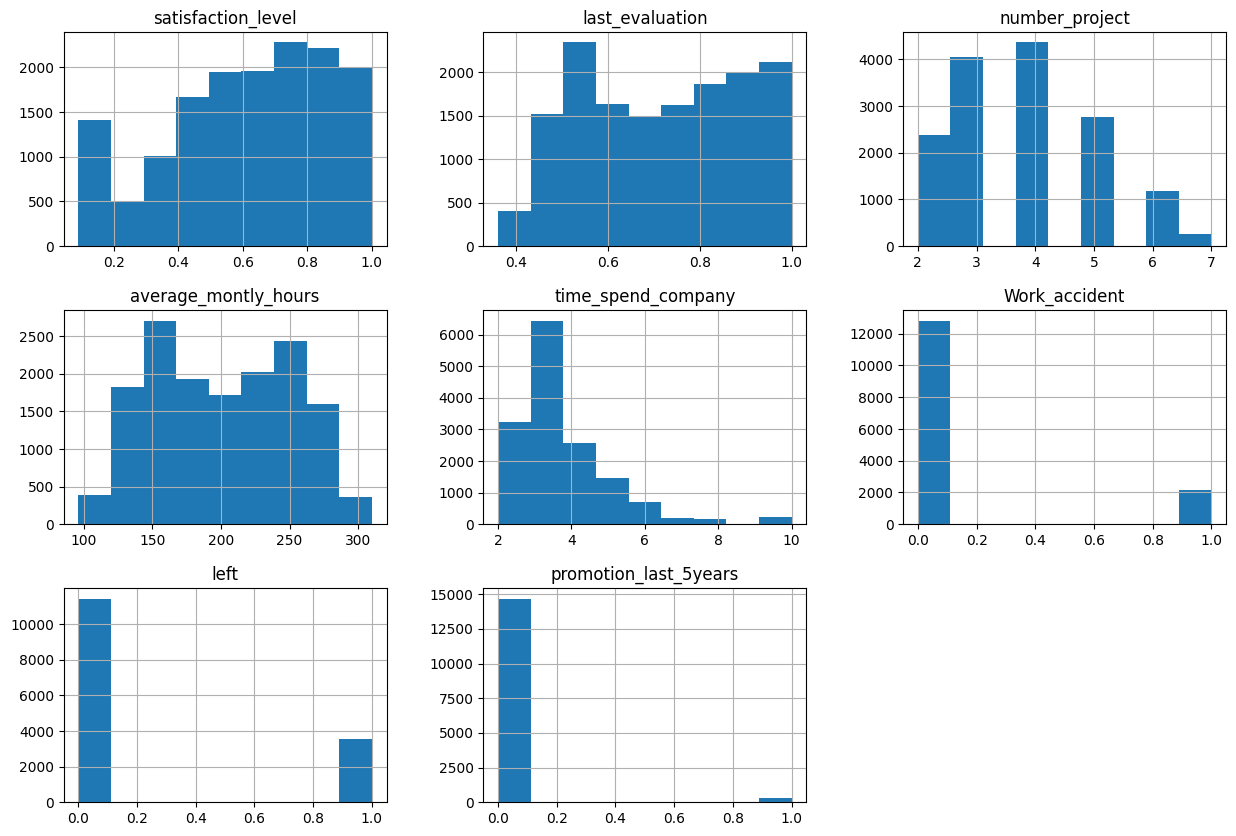

In [17]:
hr.hist(figsize=(15,10), bins=9)


In [18]:
hr['left'].value_counts()

,count
left,
0,11428
1,3571


##TRAIN TEST SPLIT

In [19]:
hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]
X=hr[X]
y=hr['left']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


##Logistic Regression

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## acc , f1 score ve confusion matrix

In [22]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))


Accuracy of Logistic Regression classifier on training set: 0.80


In [23]:
y_pred = logreg.predict(X_test)


In [24]:
acc_LR=metrics.accuracy_score(y_test, y_pred)
acc_LR

0.7964444444444444

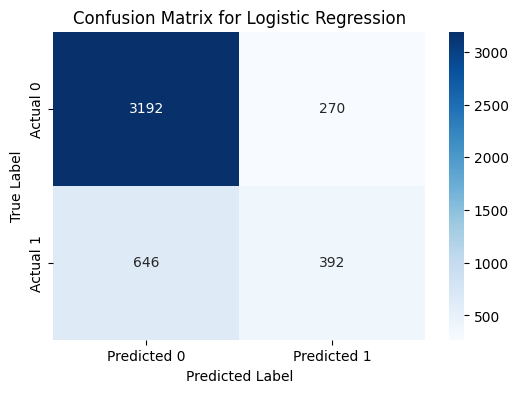

In [25]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3462
           1       0.59      0.38      0.46      1038

    accuracy                           0.80      4500
   macro avg       0.71      0.65      0.67      4500
weighted avg       0.78      0.80      0.78      4500



##KNN
##en uygun k değeri bulmak


In [27]:
kn = 10
#dizi
Accuracy =np.zeros((kn-1))

for number in range(1,kn):
    neighbors =KNeighborsClassifier(n_neighbors = number)
    neighbors.fit(X_train,y_train)
    yhat =neighbors.predict(X_test)
    Accuracy[number-1] =metrics.accuracy_score(y_test, yhat)

Accuracy

array([0.95377778, 0.95111111, 0.94311111, 0.94533333, 0.93844444,
       0.94622222, 0.94088889, 0.94333333, 0.93866667])

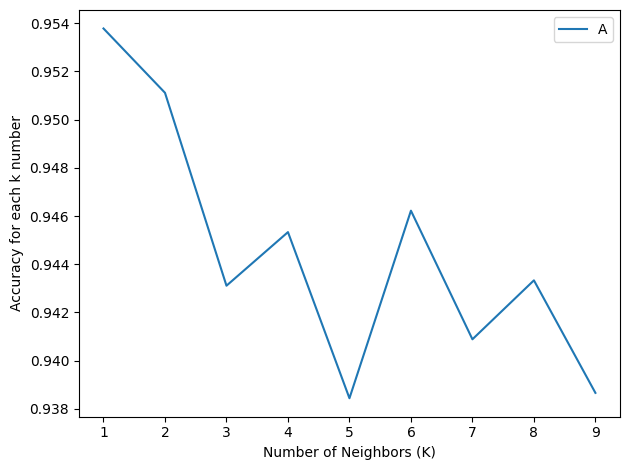

In [28]:
plt.plot(range(1,kn), Accuracy)
plt.legend('Accuracy')
plt.ylabel('Accuracy for each k number')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [29]:
neigh = KNeighborsClassifier(n_neighbors = 6)
neigh.fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=6)

In [30]:
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(neigh.score(X_train, y_train)))

Accuracy of K-NN classifier on training set: 0.96


In [31]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 0, 0, 0, 0])

##acc , f1 score ve confusion matrix

In [32]:
acc_k6=metrics.accuracy_score(y_test, yhat)
acc_k6

0.9462222222222222

In [33]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3462
           1       0.87      0.91      0.89      1038

    accuracy                           0.95      4500
   macro avg       0.92      0.93      0.93      4500
weighted avg       0.95      0.95      0.95      4500



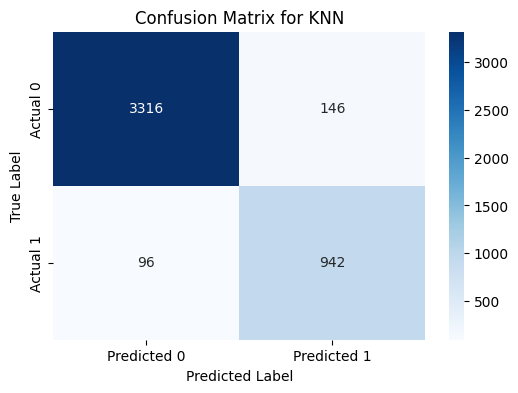

In [34]:

cm = confusion_matrix(y_test, yhat)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##Desicion Trees

In [35]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dt.fit(X_train, y_train)
dt

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [36]:
print('Accuracy of desicion tree classifier on training set: {:.2f}'.format(dt.score(X_train, y_train)))

Accuracy of desicion tree classifier on training set: 0.97


In [37]:
yhat = dt.predict(X_test)
yhat[0:5]

array([1, 0, 0, 0, 0])

##acc , f1 score ve confusion matrix

In [38]:
acc_k6=metrics.accuracy_score(y_test, yhat)
acc_k6

0.9644444444444444

In [39]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3462
           1       0.93      0.92      0.92      1038

    accuracy                           0.96      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500



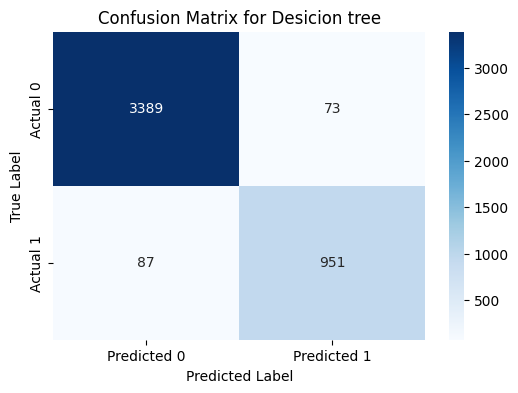

In [40]:
cm = confusion_matrix(y_test, yhat)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Desicion tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##SVM

##'linear' kernal fonksiyon  0.77 accuracy elde ettim rbf ile de 0.78

In [41]:
sVm= svm.SVC(kernel='rbf')
sVm.fit(X_train, y_train)


SVC()

In [42]:
yhat = sVm.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0])

In [43]:
print('Accuracy of SVM classifier on training set: {:.2f}'.format(sVm.score(X_train, y_train)))

Accuracy of SVM classifier on training set: 0.78


##acc , f1 score ve confusion matrix

In [44]:
acc_sVm=metrics.accuracy_score(y_test,yhat)
acc_sVm

0.7897777777777778

In [45]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      3462
           1       1.00      0.09      0.16      1038

    accuracy                           0.79      4500
   macro avg       0.89      0.54      0.52      4500
weighted avg       0.83      0.79      0.71      4500



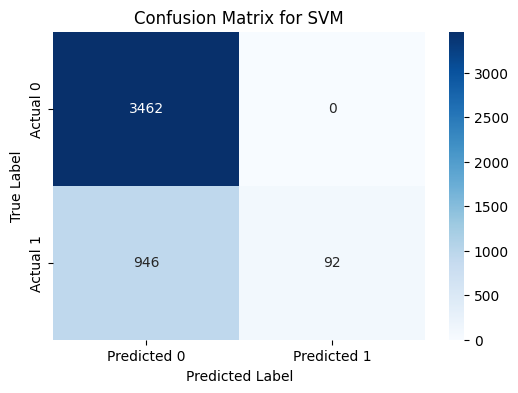

In [46]:
cm = confusion_matrix(y_test, yhat)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##naive bayes

In [47]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [48]:
y_pred = gnb.predict(X_test)

In [49]:
print('Accuracy of gnb classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))

Accuracy of gnb classifier on training set: 0.66


Naive Bayes, sürekli özellikleri Gauss (normal) distribution varsayarak ele alır. Veriler normal dağılımlı değilse, bu varsayım düşük performansa yol açabilir.

özellikler arasındaki herhangi bir ilişki(correlation) performansını düşürebilir

Naive Bayes, çoğunluk sınıfını tercih etme eğilimindedir; bu da aslında ayrılan (1) çalışanların çoğunun kalacağını (0) öngördüğü için birçok Yanlış Olumsuz sonuçla sonuçlanır.

##acc , f1 score ve confusion matrix

In [50]:
acc_gnb=metrics.accuracy_score(y_test,y_pred)
acc_gnb

0.6642222222222223

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74      3462
           1       0.39      0.84      0.53      1038

    accuracy                           0.66      4500
   macro avg       0.66      0.72      0.64      4500
weighted avg       0.80      0.66      0.69      4500



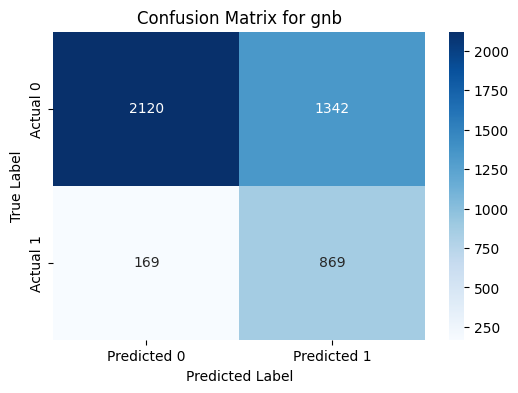

In [52]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for gnb')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##CNN

In [53]:

# Feature scaling (CNN icin onemli)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model, CNN  gibi sinir ağlarıyla çalışırken verilerin üç boyutlu (3D) görünmesini bekler.
## Bizim durumumuzda orijinal veriler 2D'dir (örnek sayısı x özellik sayısı),
## dolayısıyla her özelliği ayrı bir kanal olarak temsil etmek için 1 değerine sahip üçüncü bir boyut ekliyoruz.

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


katmanlar

In [54]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # İkili sınıflandırma için çıktı katmanı

egitim

In [55]:
# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8073 - loss: 0.4071 - val_accuracy: 0.9381 - val_loss: 0.1966
Epoch 2/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9407 - loss: 0.1880 - val_accuracy: 0.9495 - val_loss: 0.1756
Epoch 3/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9510 - loss: 0.1652 - val_accuracy: 0.9529 - val_loss: 0.1595
Epoch 4/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9490 - loss: 0.1575 - val_accuracy: 0.9538 - val_loss: 0.1515
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9529 - loss: 0.1555 - val_accuracy: 0.9662 - val_loss: 0.1444
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9564 - loss: 0.1351 - val_accuracy: 0.9457 - val_loss: 0.1591
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9602 - loss: 0.1275 - val_accuracy: 0.9686 - val_loss: 0.1261
Epoch 8/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9680 - loss: 0.1146 - val_accuracy: 0.

In [56]:
y_pred = model.predict(X_test)

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [57]:
_,accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9675 - loss: 0.1104
Accuracy: 96.73


##acc , f1 score ve confusion matrix

In [58]:
#Olasılıkları binary sınıf'a dönüştürme
y_pred_classes = (y_pred > 0.5).astype(int)

acc_cnn=metrics.accuracy_score(y_test,y_pred_classes)
acc_cnn

0.9673333333333334

In [59]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3462
           1       0.95      0.90      0.93      1038

    accuracy                           0.97      4500
   macro avg       0.96      0.95      0.95      4500
weighted avg       0.97      0.97      0.97      4500



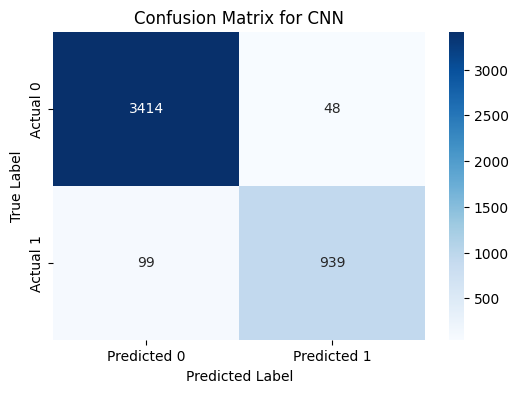

In [60]:
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for CNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()